In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import island_evo_simulation_methods as ie




%matplotlib inline

font = {'family' : 'serif',
        'size'   : 16}
text = {'usetex' : True}

plt.rc('font', **font)
plt.rc('text',**text)
plt.rc('axes', titlesize=18)

# Scaling with g

In [104]:
file_name = 'g_scaling0_summary2.npz'
with np.load(file_name) as file:
    data = file['data'].item()

D = 100, M = 11.5, logN = 4.0 M, mu = 3, epoch_time = 8K M


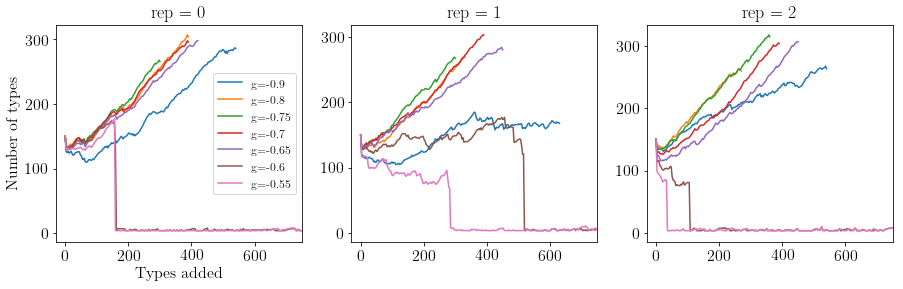

In [105]:
# D = data['D']
g_vec = data['g_vec']
M = data['M']
epoch_timescale = data['epoch_timescale']
logN = data['logN']
rep_num = data['rep_num']
mu = data['mu']

num_alive_array = data['num_alive_array']

print('D = {}, M = {:.1f}, logN = {} M, mu = {}, epoch_time = {}K M'.format(D,M,logN/M,mu,epoch_timescale))

plt.figure(figsize=(15,4))
for ind1 in range(rep_num):
    plt.subplot(1,rep_num,ind1+1)
    for ind0 in range(len(g_vec)):
        g = g_vec[ind0]
        num_alive = num_alive_array[ind0,ind1]
#         num_alive[num_alive==0] = np.nan
        plt.plot(mu*np.arange(len(num_alive)),num_alive,label='g={}'.format(g))
        
    if ind1==0:
        plt.legend(prop={'size':12})
        plt.ylabel('Number of types')
        plt.xlabel('Types added')
    plt.title('rep = {}'.format(ind1))
    plt.xlim((-30,750))

plt.show()
    


Fraction of extinctions after halfway in epoch: 0.15


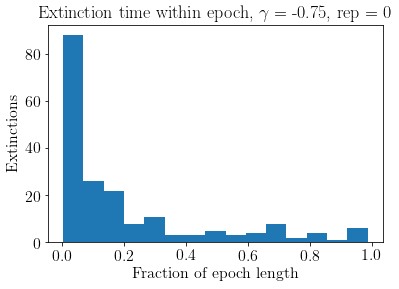

In [103]:
rep_ind = 0
g_ind = 2
list_ind = 3*g_ind+rep_ind
extinct_times = data['extinct_time_list'][list_ind]
epoch_times = data['epoch_time_list'][list_ind]

running_times = np.cumsum(epoch_times)

epoch_fraction_list = []

for ind in range(len(running_times)-1):
    
    end_time = running_times[ind]
    start_time = running_times[ind]-epoch_times[ind]
    extinct_in_epoch = np.logical_and(extinct_times<end_time,extinct_times>=start_time)
    
    epoch_fraction = (extinct_times[extinct_in_epoch] - start_time)/epoch_times[ind]
    
    epoch_fraction_list.append(epoch_fraction)
    
fracs = np.concatenate(epoch_fraction_list)
plt.hist(fracs,15)
# plt.yscale('log')

print('Fraction of extinctions after halfway in epoch: {:.2f}'.format(np.sum(fracs>.5)/len(fracs)))
plt.ylabel('Extinctions')
plt.xlabel('Fraction of epoch length')
plt.title(r'Extinction time within epoch, $\gamma$ = {}, rep = {}'.format(data['g_vec'][g_ind],rep_ind))

# Sudden collapse

In [95]:
file_name = 'g_scaling0_g6_rep0.npz'
with np.load(file_name) as file:
    data = file['class_obj'].item()
    
data.keys()

dict_keys(['thresh', 'lambda_mean_ave_list', 'K', 'eta_list', 'mu', 'n_traj_f', 'N', 'extinct_time_array', 'increment', 'mig_mean_list', 'epoch_time_list', 'file_name', 'n_mean_ave_list', 'n_init_list', 'M', 'n_mean_std_list', 'm', 'lambda_mean_std_list', 'dt', 'epoch_num', 'n2_mean_ave_list', 'K_tot', 'eta_mean_list', 'dt_list', 'sim_end_time', 'n_alive', 'c_A', 'V', 'D', 'sim_start_time', 'inv_fac', 'sample_num', 'epoch_timescale', 'gamma', 'n_cross_mean_list', 'n_traj_eq', 'seed', 'n2_mean_std_list'])

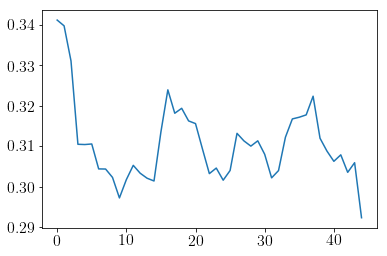

In [99]:
plt.plot(data['lambda_mean_ave_list'][0:45])

In [106]:
(1-0.55)*np.sqrt(11.5/150)

0.12459935794377111

In [33]:
n_alive = data['n_alive']
num_alive = np.sum(n_alive,axis=0)
collapse_ind = np.min(np.arange(len(num_alive))[num_alive<50])-1

init_bool = n_alive[:,collapse_ind]
n_init = data['n_init_list'][collapse_ind]
V_init = data['V'][init_bool,:][:,init_bool]

print(n_init.shape)
print(V_init.shape)

(100, 177)
(177, 177)


In [38]:
seed = data['seed']
D = data['D']
K = len(n_init)
M = data['M']
gamma = data['gamma']
thresh = data['thresh']
inv_fac = data['inv_fac']

dt = data['dt']
mu = data['mu']
epoch_timescale = data['epoch_timescale']
epoch_num = 1
sample_num = 20

file_name = 'g_scaling0_collapse2'

ie.AntisymEvo2(file_name, D, K, M, gamma, thresh, inv_fac, dt, mu, seed, epoch_timescale, 
               epoch_num, sample_num,n_init=n_init,V_init = V_init)

/Users/michaelpearce/Google Drive/Research/Projects/Ecology Projects/Island Eco model/Simulations/Cluster/island-evo-collab/island-evo/cluster_simulations/island_evo_simulation_methods.py:1650: RuntimeWarning: divide by zero encountered in true_divide
  temp_rats = np.divide(nbar, n0)  # remove infinities
/Users/michaelpearce/Google Drive/Research/Projects/Ecology Projects/Island Eco model/Simulations/Cluster/island-evo-collab/island-evo/cluster_simulations/island_evo_simulation_methods.py:1650: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(nbar, n0)  # remove infinities


1
2


7.841944824946198

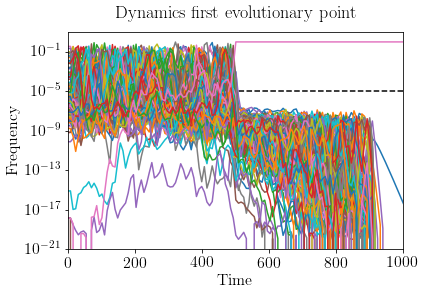

In [48]:
file_name = 'g_scaling0_collapse.npz'
with np.load(file_name) as file:
    data = file['class_obj'].item()
    
dt = data['dt_list'][0]*data['sample_num']
t_max = dt*np.shape(data['n_traj_eq'])[1]
tvec = np.arange(0,t_max-dt/2,dt)
mu = data['mu']

plt.figure()

n_traj = data['n_traj_eq']
K0 = n_traj.shape[0]

for ii in range(K0):
    plt.plot(tvec,n_traj[ii,:]);
    
    
plt.xlim((0,1000))

plt.yscale('log')
plt.hlines(y = np.exp(-data['M']),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M$')
# plt.legend()
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Dynamics first evolutionary point',y=1.03)

In [82]:
n_alive = data['n_alive'][:,0]
V = data['V'][n_alive,:][:,n_alive]
surv_ind = int(np.arange(np.sum(n_alive))[n_traj[:,-1]>0])

print(V[surv_ind,:])
print(V[:,surv_ind])

[-2.81214856e-01 -4.56292029e-01 -4.85102354e-01  1.33072344e-01
 -9.57225712e-01  5.19992541e-01 -6.87973439e-01  9.50166411e-01
  5.00836390e-01 -9.23664474e-01 -9.68759741e-01 -1.94606625e+00
  5.25316523e-03  2.24126650e-01 -1.11431718e+00 -1.29869653e-01
 -7.47274594e-01 -1.16952034e+00  1.78913632e+00  1.25078773e+00
 -4.79633582e-01 -4.57811823e-01  2.68430809e-01  1.80242519e+00
  1.53088508e-01 -1.15042139e+00  1.32047581e+00 -3.28109263e-01
  2.37001439e+00  8.30980473e-01  2.04588621e-01  2.26010540e-01
 -1.93530936e-01  7.31712546e-01 -4.70345348e-02  9.93707840e-01
  1.14754923e+00 -2.58403840e-01 -5.92415751e-01  9.26714916e-01
 -1.03873808e+00  1.33240948e+00  1.60639459e+00 -1.10918070e-01
 -9.43304011e-01  1.13521689e+00  1.46386625e-01 -3.57133528e-01
 -7.32109169e-01  2.70916279e-01 -2.88194132e+00 -5.05030282e-01
 -8.08817237e-01 -1.08332896e+00 -8.01756139e-01  1.10685035e-01
  1.36214946e-02 -1.52477247e-01  4.03083215e-01  4.64705341e-01
  4.00443964e-01 -1.21618

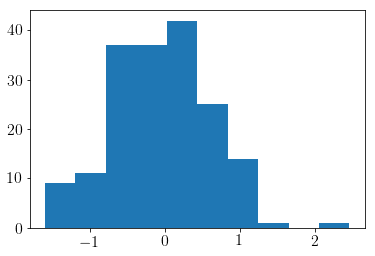

In [85]:
plt.hist(np.diag(V));
plt.xlabel('Self-interaction')
plt.ylabel('')

In [91]:
data['lambda_mean_ave_list']

[2.395960643636333, 2.4594342666417757]

In [89]:
1+gamma

0.44999999999999996

In [107]:
np.exp(-20)

2.061153622438558e-09

In [111]:
np.exp(30)/1e13

1.0686474581524463